# FR-I/FR-II Download

*Matthew Alger, ANU RSAA/Data61, 2018*

This notebook downloads imagery for FR-I and FR-II radio galaxies from [FRI*CAT*](https://www.aanda.org/articles/aa/abs/2017/02/aa29287-16/aa29287-16.html) and [FRII*CAT*](https://www.aanda.org/articles/aa/abs/2017/05/aa30247-16/aa30247-16.html).

## Obtain the catalogues

In [109]:
import io
import warnings

from astropy.coordinates import SkyCoord
import astropy.io.fits
from astroquery.vizier import Vizier
import h5py
import matplotlib.pyplot as plt
import numpy
import pandas
import requests

Vizier.ROW_LIMIT = -1
%matplotlib inline

OUTPUT_PATH = '/Users/alger/data/FIRST/FRI-FRII-29-01-18.h5'

In [72]:
_r = requests.get('https://heasarc.gsfc.nasa.gov/cgi-bin/W3Browse/w3hdprods.pl?Coordinates=Equatorial&Equinox=2000&savedQuery=&maxrows=1000&requerydisplay=TextDisplay&redisplay=Redisplay&displaymode=PureTextDisplay&req_heasarc%255Ffricat=%252ABrowse%25253A%25253AHeasarcQuery%252C%257Bquals%252C%2528%2529%252Cmaxrows%252C%25271000%2527%252Cfields%252C%2528%2527galaxy%25255Fsample%2527%252C%2527name%2527%252C%2527ra%2527%252C%2527dec%2527%252C%2527lii%2527%252C%2527bii%2527%252C%2527redshift%2527%252C%2527nvss%25255Fflux%25255F1p4%25255Fghz%2527%252C%2527o%25255Fiii%25255Fflux%2527%252C%2527rmag%2527%252C%2527dn%25255F4000%25255Findex%2527%252C%2527stellar%25255Fdispersion%2527%252C%2527concentration%25255Findex%2527%252C%2527log%25255F1p4%25255Fghz%25255Fluminosity%2527%252C%2527log%25255Fo%25255Fiii%25255Fluminosity%2527%252C%2527log%25255Fblack%25255Fhole%25255Fmass%2527%2529%252Cradius%252C%25271%2527%252Cstatus%252C%2527initiate%2527%252Cpositions%252Cnull%252Ctable%252C%2527heasarc%25255Ffricat%2527%252Cdirs%252C%2528%2529%252Csorts%252C%2528%2529%257D&ra_heasarc%255Ffricat=ra&dec_heasarc%255Ffricat=dec&numeric_heasarc%255Ffricat=nvss_flux_1p4_ghz%2Clog_1p4_ghz_luminosity%2Crmag%2Cdec%2Clog_black_hole_mass%2Co_iii_flux%2Credshift%2Cra%2Clog_o_iii_luminosity%2C_Search_Offset%2Cdn_4000_index%2Cbii%2Clii%2Cconcentration_index%2Cstellar_dispersion')
fricat = pandas.read_csv(io.StringIO(r.text), sep='|', skiprows=4)
fricat.columns = fricat.columns.str.strip()

In [39]:
friicat = Vizier.get_catalogs('J/A+A/601/A81')[0].to_pandas()

In [60]:
assert len(fricat) == 233
assert len(friicat) == 123

In [85]:
def get_first(coord: 'SkyCoord', size: 'arcmin'=5):
    """Download images from the FIRST cutout server."""
    data = {
        'RA': coord.to_string(style='hmsdms', sep=' '),
        'Dec': '',
        'Equinox': 'J2000',
        'ImageSize': size,
        'ImageType': 'FITS Image',
        'MaxInt': 10,
        'Epochs': '',
        'Fieldname': '',
        '.submit': 'Extract the Cutout ',
        '.cgifields': 'ImageType',
    }
    url = 'https://third.ucllnl.org/cgi-bin/firstcutout'
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        response = requests.post(url, data=data, stream=False, verify=False)
    if response.text.startswith('<PRE>'):
        return
    return astropy.io.fits.open(io.BytesIO(response.content))

In [73]:
fricat.head()

,Unnamed: 0,galaxy_sample,name,ra,dec,lii,bii,redshift,nvss_flux_1p4_ghz,o_iii_flux,rmag,dn_4000_index,stellar_dispersion,concentration_index,log_1p4_ghz_luminosity,log_o_iii_luminosity,log_black_hole_mass,Unnamed: 17
0,NaN,M,SDSS J003930.52-103218.6,00 39 30.52,-10 32 18.6,112.75398,-73.17408,0.129,23.7,1.900e-17,15.996,1.97,238,3.14,40.19,38.94,8.4,NaN
1,NaN,M,SDSS J011255.11-095040.6,01 12 55.11,-09 50 40.6,140.28297,-71.98895,0.124,81.7,2.080e-16,16.026,1.84,220,2.99,40.69,39.95,8.3,NaN
2,NaN,M,SDSS J004148.22-091703.1,00 41 48.22,-09 17 03.1,115.21397,-72.01142,0.053,53.0,2.560e-16,15.230,2.01,255,3.01,39.72,39.26,8.6,NaN
3,NaN,M,SDSS J004300.63-091346.3,00 43 00.63,-09 13 46.3,116.19152,-71.99090,0.076,148.4,4.070e-16,15.437,1.96,244,3.32,40.50,39.79,8.5,NaN
4,NaN,M,SDSS J223143.19-082431.7,22 31 43.19,-08 24 31.7,55.86735,-52.04553,0.083,766.0,6.110e-16,14.149,2.01,301,2.86,41.29,40.04,8.8,NaN


In [62]:
friicat.head()

,SDSS,z,S1.4GHz,F_OIII_,rmag,Dn4000,sigma,Cr,lognuLr,logL_OIII_,logMBH,Class,Sloan,SimbadName,_RA,_DE
0,b'J001247.57+004715.8',0.148,58.599998,11.500000,16.351999,2.07,263.0,2.99,40.720001,39.860001,8.6,b'LEG',b'Sloan',b'SDSS J001247.57+004715.8',3.19821,0.78772
1,b'J002107.62-005531.4',0.108,111.900002,3.300000,15.351000,1.99,250.0,3.17,40.700001,39.020000,8.5,b'LEG',b'Sloan',b'SDSS J002107.62-005531.4',5.28175,-0.92539
2,b'J004326.80-105421.8',0.127,82.300003,176.600006,15.834000,1.92,247.0,2.92,40.720001,40.900002,8.5,b'LEG',b'Sloan',b'SDSS J004326.80-105421.8',10.86167,-10.90606
3,b'J004404.66+010152.9',0.112,366.000000,126.099998,16.426001,1.78,219.0,3.48,41.240002,40.639999,8.3,b'LEG',b'Sloan',b'SDSS J004404.66+010152.9',11.01942,1.03136
4,b'J011830.65-104356.4',0.126,56.299999,7.000000,16.681000,1.83,224.0,2.90,40.540001,39.490002,8.3,b'LEG',b'Sloan',b'SDSS J011830.65-104356.4',19.62771,-10.73233


## Download the imagery

In [88]:
# FRICAT
images = []
for i, obj in fricat.iterrows():
    print('{}/{}'.format(i + 1, len(fricat)))
    coord = SkyCoord('{} {}'.format(obj['ra'], obj['dec']),
                     unit=('hour', 'deg'))
    im = get_first(coord, size=8)
    images.append(im)

1/233
2/233
3/233
4/233
5/233
6/233
7/233
8/233
9/233
10/233
11/233
12/233
13/233
14/233
15/233
16/233
17/233
18/233
19/233
20/233
21/233
22/233
23/233
24/233
25/233
26/233
27/233
28/233
29/233
30/233
31/233
32/233
33/233
34/233
35/233
36/233
37/233
38/233
39/233
40/233
41/233
42/233
43/233
44/233
45/233
46/233
47/233
48/233
49/233
50/233
51/233
52/233
53/233
54/233
55/233
56/233
57/233
58/233
59/233
60/233
61/233
62/233
63/233
64/233
65/233
66/233
67/233
68/233
69/233
70/233
71/233
72/233
73/233
74/233
75/233
76/233
77/233
78/233
79/233
80/233
81/233
82/233
83/233
84/233
85/233
86/233
87/233
88/233
89/233
90/233
91/233
92/233
93/233
94/233
95/233
96/233
97/233
98/233
99/233
100/233
101/233
102/233
103/233
104/233
105/233
106/233
107/233
108/233
109/233
110/233
111/233
112/233
113/233
114/233
115/233
116/233
117/233
118/233
119/233
120/233
121/233
122/233
123/233
124/233
125/233
126/233
127/233
128/233
129/233
130/233
131/233
132/233
133/233
134/233
135/233
136/233
137/233
138/233
139/

In [94]:
# FRIICAT
assert len(images) == len(fricat)
for i, obj in friicat.iterrows():
    print('{}/{}'.format(i + 1, len(friicat)))
    coord = SkyCoord('{} {}'.format(obj['_RA'], obj['_DE']),
                     unit=('deg', 'deg'))
    im = get_first(coord, size=8)
    images.append(im)

1/123
2/123
3/123
4/123
5/123
6/123
7/123
8/123
9/123
10/123
11/123
12/123
13/123
14/123
15/123
16/123
17/123
18/123
19/123
20/123
21/123
22/123
23/123
24/123
25/123
26/123
27/123
28/123
29/123
30/123
31/123
32/123
33/123
34/123
35/123
36/123
37/123
38/123
39/123
40/123
41/123
42/123
43/123
44/123
45/123
46/123
47/123
48/123
49/123
50/123
51/123
52/123
53/123
54/123
55/123
56/123
57/123
58/123
59/123
60/123
61/123
62/123
63/123
64/123
65/123
66/123
67/123
68/123
69/123
70/123
71/123
72/123
73/123
74/123
75/123
76/123
77/123
78/123
79/123
80/123
81/123
82/123
83/123
84/123
85/123
86/123
87/123
88/123
89/123
90/123
91/123
92/123
93/123
94/123
95/123
96/123
97/123
98/123
99/123
100/123
101/123
102/123
103/123
104/123
105/123
106/123
107/123
108/123
109/123
110/123
111/123
112/123
113/123
114/123
115/123
116/123
117/123
118/123
119/123
120/123
121/123
122/123
123/123


In [95]:
assert len(images) == len(fricat) + len(friicat)

## Compiling images into an HDF5 file

The format will be

```
/images
/labels
/fri_data/
    /galaxy_sample
    /...
/frii_data/
    /SDSS
    /...
```

In [96]:
images_fri = images[:len(fricat)]
images_frii = images[len(fricat):]

In [104]:
images_fri_array = numpy.zeros((len(images_fri),) + images_fri[0][0].shape)
for i, im in enumerate(images_fri):
    images_fri_array[i] = im[0].data

In [105]:
images_frii_array = numpy.zeros((len(images_frii),) + images_fri[0][0].shape)
for i, im in enumerate(images_frii):
    images_frii_array[i] = im[0].data

In [110]:
labels = numpy.zeros((len(images),), dtype=bool)
labels[:len(fricat)] = False
labels[len(fricat):] = True

In [126]:
with h5py.File(OUTPUT_PATH, 'w') as f:
    f.create_dataset('images', data=numpy.concatenate([images_fri_array, images_frii_array], axis=0))
    f.create_dataset('labels', data=labels)
    fri_data = f.create_group('fri_data')
    for i in fricat.columns:
        try:
            col = pandas.to_numeric(fricat[i]).as_matrix()
        except ValueError:
            col = fricat[i].as_matrix().astype('S')
        fri_data.create_dataset(i, data=col)
    frii_data = f.create_group('frii_data')
    for i in friicat.columns:
        try:
            col = pandas.to_numeric(friicat[i]).as_matrix()
        except ValueError:
            col = friicat[i].as_matrix().astype('S')
        frii_data.create_dataset(i, data=col)

## Confirm things worked

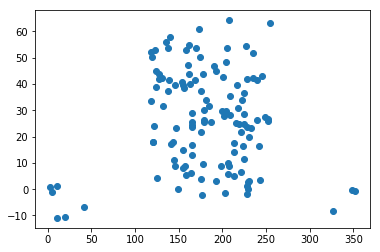

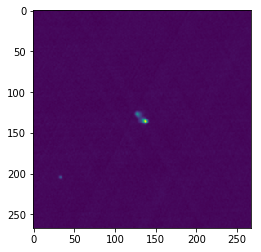

In [135]:
with h5py.File(OUTPUT_PATH, 'r') as f:
    plt.scatter(f['frii_data']['_RA'], f['frii_data']['_DE'])
    plt.show()
    plt.imshow(f['images'][350])